In [38]:
# Import libraries
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import helper
from itertools import product

In [39]:
# Load retention time data
tdata = pd.read_csv("../retention2.min.csv.gz")

# Time point
timept = 10000

# Max
MAX = 60

In [41]:
# Get PBA allocations
pba_allocations_bpc = {1: set(), 2: set()}
for gamma in np.arange(0, 0.0061, 0.0002):
    print("gamma =", gamma)
    lvlcands = {}
    for (lower, upper), d in tdata[tdata["timept"] == timept].groupby(["lower","upper"]):
        lvlcand = d.mean()[["timept","lower","upper","width","successes","failures","reads","sets","resets","cycles","read_bits","set_bits","reset_bits","lvl","time"]].to_dict()
        lvl, cdf = sorted(d["lvl"].values), np.linspace(0.5/len(d), 1-0.5/len(d), len(d)) # symmetric percentile CDF (https://math.stackexchange.com/questions/33488/how-to-calculate-percentile-is-it-possible-to-get-100-percentile)
        try:
            lvlcand["lower_rd"] = int(np.floor(helper.intersection(np.array([0,64]), np.array([gamma,gamma]), np.array(lvl), cdf)[0][0]))
            lvlcand["upper_rd"] = int(np.ceil(helper.intersection(np.array([0,64]), np.array([1-gamma,1-gamma]), np.array(lvl), cdf)[0][0]))
        except IndexError:
            lvlcand["lower_rd"] = min(lvl)
            lvlcand["upper_rd"] = max(lvl)
        lvlcands[(int(lower), int(upper))] = lvlcand

    pba_allocations = []
    cur_upper = -1
    while True:
        cands = [lvlcand for lvlcand in lvlcands.values() if lvlcand["lower_rd"] > cur_upper]
        if cands == []:
            break
        next_cur_upper = min([cand["upper_rd"] for cand in cands])
        pba_allocations.append([(int(cand["lower"]), int(cand["upper"])) for cand in cands if cand["upper_rd"] == next_cur_upper])
        cur_upper = next_cur_upper
    print(pba_allocations)
    if len(pba_allocations) >= 2:
        pba_allocations_bpc[1].update(product(*pba_allocations[:2]))
    if len(pba_allocations) >= 4:
        pba_allocations_bpc[2].update(product(*pba_allocations[:4]))
pba_allocations_bpc

gamma = 0.005
[[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 58), (0, 59), (0, 60), (0, 61), (0, 62), (0, 63), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 47), (1, 48), (1, 49), (1

{1: {((0, 7), (18, 63)),
  ((0, 7), (19, 63)),
  ((0, 7), (20, 63)),
  ((0, 7), (21, 63)),
  ((0, 7), (22, 63)),
  ((0, 7), (23, 63)),
  ((0, 7), (24, 63)),
  ((0, 7), (25, 63)),
  ((0, 7), (26, 63)),
  ((0, 7), (27, 63)),
  ((0, 7), (28, 63)),
  ((0, 7), (29, 63)),
  ((0, 7), (30, 63)),
  ((0, 7), (31, 63)),
  ((0, 7), (32, 63)),
  ((0, 7), (33, 63)),
  ((0, 7), (34, 63)),
  ((0, 7), (35, 63)),
  ((0, 7), (36, 63)),
  ((0, 7), (37, 63)),
  ((0, 7), (38, 63)),
  ((0, 7), (39, 63)),
  ((0, 7), (40, 63)),
  ((0, 7), (41, 63)),
  ((0, 7), (42, 63)),
  ((0, 7), (43, 63)),
  ((0, 7), (44, 63)),
  ((0, 7), (45, 63)),
  ((0, 7), (46, 63)),
  ((0, 7), (47, 63)),
  ((0, 7), (48, 63)),
  ((0, 7), (49, 63)),
  ((0, 7), (50, 63)),
  ((0, 7), (51, 63)),
  ((0, 7), (52, 63)),
  ((0, 7), (53, 63)),
  ((0, 7), (54, 63)),
  ((0, 7), (55, 63)),
  ((0, 7), (56, 63)),
  ((0, 7), (57, 63)),
  ((0, 7), (58, 63)),
  ((0, 7), (59, 63)),
  ((0, 7), (60, 63)),
  ((0, 7), (61, 63)),
  ((0, 7), (62, 63)),
  ((0, 

In [42]:
# Digraph
DG = nx.DiGraph()
DG.add_nodes_from(lvlcands.items())
DG.add_edges_from([(cand1, cand2) for cand1 in lvlcands for cand2 in lvlcands if lvlcands[cand2]["lower_rd"] > lvlcands[cand1]["upper_rd"]])
DG.number_of_nodes(), DG.number_of_edges()

(2017, 23618)

In [43]:
# Get all possible level allocations
allocations = []
for root in [(0,j) for j in range(64)]:
  for leaf in [(k,63) for k in range(root[1], MAX+1)]:
    print("ROOT", root, "LEAF", leaf)
    try:
      for path in nx.all_simple_paths(DG, root, leaf):
        allocations.append(tuple(path))  
    except nx.NodeNotFound:
       pass
len(allocations)

ROOT (0, 0) LEAF (0, 62)
ROOT (0, 0) LEAF (1, 62)
ROOT (0, 0) LEAF (2, 62)
ROOT (0, 0) LEAF (3, 62)
ROOT (0, 0) LEAF (4, 62)
ROOT (0, 0) LEAF (5, 62)
ROOT (0, 0) LEAF (6, 62)
ROOT (0, 0) LEAF (7, 62)
ROOT (0, 0) LEAF (8, 62)
ROOT (0, 0) LEAF (9, 62)
ROOT (0, 0) LEAF (10, 62)
ROOT (0, 0) LEAF (11, 62)
ROOT (0, 0) LEAF (12, 62)
ROOT (0, 0) LEAF (13, 62)
ROOT (0, 0) LEAF (14, 62)
ROOT (0, 0) LEAF (15, 62)
ROOT (0, 0) LEAF (16, 62)
ROOT (0, 0) LEAF (17, 62)
ROOT (0, 0) LEAF (18, 62)
ROOT (0, 0) LEAF (19, 62)
ROOT (0, 0) LEAF (20, 62)
ROOT (0, 0) LEAF (21, 62)
ROOT (0, 0) LEAF (22, 62)
ROOT (0, 0) LEAF (23, 62)
ROOT (0, 0) LEAF (24, 62)
ROOT (0, 0) LEAF (25, 62)
ROOT (0, 0) LEAF (26, 62)
ROOT (0, 0) LEAF (27, 62)
ROOT (0, 0) LEAF (28, 62)
ROOT (0, 0) LEAF (29, 62)
ROOT (0, 0) LEAF (30, 62)
ROOT (0, 0) LEAF (31, 62)
ROOT (0, 0) LEAF (32, 62)
ROOT (0, 0) LEAF (33, 62)
ROOT (0, 0) LEAF (34, 62)
ROOT (0, 0) LEAF (35, 62)
ROOT (0, 0) LEAF (36, 62)
ROOT (0, 0) LEAF (37, 62)
ROOT (0, 0) LEAF (38, 

8263

In [44]:
# Get all 1-2 bpc allocations
allocations_bpc = {1 : [a for a in allocations if len(a) == 2], 2 : [a for a in allocations if len(a) == 4]}
{k : len(v) for k, v in allocations_bpc.items()}

{1: 8263, 2: 0}

In [45]:
# Plot BW-BER tradeoff in level allocations
results = []
for bpc in range(1, 3):
    for i, a in enumerate(allocations_bpc[bpc] + list(pba_allocations_bpc[bpc])):
        if i % 10 == 0:
            print(bpc, i)

        rdbounds = [0]
        for lvl1, lvl2 in zip(a[:-1], a[1:]):
            rdbounds.append(int((lvlcands[lvl1]["upper_rd"] + lvlcands[lvl2]["lower_rd"]) // 2))
        rdbounds.append(64)

        times, confmat = [], []
        for i, lvl in enumerate(a):
            # Get the relevant data
            lvldata = tdata[(tdata["timept"] == timept) & (tdata["lower"] == lvl[0]) & (tdata["upper"] == lvl[1])]

            # Compute average time to target level
            times.append(lvldata["cycles"].mean() * 10e-9)

            # Compute the CER for level
            confvec = []
            for rdbound_low, rdbound_high in zip(rdbounds[:-1], rdbounds[1:]):
                confvec.append(lvldata[(lvldata["lvl"] > rdbound_low) & (lvldata["lvl"] <= rdbound_high)].count()[0])
            confmat.append(confvec)
        times, confmat = np.array(times), np.array(confmat)
        
        # Compute overall results
        bw = (48 - np.genfromtxt("../settings/dead_columns.csv", delimiter=",").size) / times.mean() * bpc

        # Symbol error magnitudes
        mae = sum(abs(i - j) * confmat[i][j] for i in range(2**bpc) for j in range(2**bpc)) / confmat.sum()
        rmse = np.sqrt(sum((i - j)**2 * confmat[i][j] for i in range(2**bpc) for j in range(2**bpc)) / confmat.sum())

        # Function to get Gray code string
        getgray = lambda x : format(2**(2**bpc) + x^x//2, f"0{2**bpc-1}b")[1:]

        # Function to get Gray code error rate for each possible symbol confusion
        grayerr = np.array([[sum([int(ic != jc) for ic, jc in zip(getgray(i), getgray(j))]) for i in range(2**bpc)] for j in range(2**bpc)]) / bpc

        # BER
        ber = (grayerr * confmat).sum() / confmat.sum()

        # CER
        cer = 1 - confmat.trace() / confmat.sum()

        # Is a PBA allocation
        is_pba = a in pba_allocations_bpc[bpc]

        # Results
        results.append([bpc, a, rdbounds, confmat, bw, ber, cer, is_pba])

# Get dataframe
data = pd.DataFrame(results, columns=["bpc", "allocation", "read_bounds", "confmat", "bw", "ber", "cer", "is_pba"]).sort_values(["ber", "bw"], ascending=[True, False])
data.to_csv("../data/allocation/allocations_wear.csv", index=False)
data

1 0
1 10
1 20
1 30
1 40
1 50
1 60
1 70
1 80
1 90
1 100
1 110
1 120
1 130
1 140
1 150
1 160
1 170
1 180
1 190
1 200
1 210
1 220
1 230
1 240
1 250
1 260
1 270
1 280
1 290
1 300
1 310
1 320
1 330
1 340
1 350
1 360
1 370
1 380
1 390
1 400
1 410
1 420
1 430
1 440
1 450
1 460
1 470
1 480
1 490
1 500
1 510
1 520
1 530
1 540
1 550
1 560
1 570
1 580
1 590
1 600
1 610
1 620
1 630
1 640
1 650
1 660
1 670
1 680
1 690
1 700
1 710
1 720
1 730
1 740
1 750
1 760
1 770
1 780
1 790
1 800
1 810
1 820
1 830
1 840
1 850
1 860
1 870
1 880
1 890
1 900
1 910
1 920
1 930
1 940
1 950
1 960
1 970
1 980
1 990
1 1000
1 1010
1 1020
1 1030
1 1040
1 1050
1 1060
1 1070
1 1080
1 1090
1 1100
1 1110
1 1120
1 1130
1 1140
1 1150
1 1160
1 1170
1 1180
1 1190
1 1200
1 1210
1 1220
1 1230
1 1240
1 1250
1 1260
1 1270
1 1280
1 1290
1 1300
1 1310
1 1320
1 1330
1 1340
1 1350
1 1360
1 1370
1 1380
1 1390
1 1400
1 1410
1 1420
1 1430
1 1440
1 1450
1 1460
1 1470
1 1480
1 1490
1 1500
1 1510
1 1520
1 1530
1 1540
1 1550
1 1560
1 1570
1 158

,bpc,allocation,read_bounds,confmat,bw,ber,cer,is_pba
2892,1,"((2, 35), (50, 63))","[0, 41, 64]","[[1443, 9], [0, 1408]]",304121.625611,0.003147,0.003147,True
8411,1,"((2, 35), (50, 63))","[0, 41, 64]","[[1443, 9], [0, 1408]]",304121.625611,0.003147,0.003147,True
2893,1,"((2, 35), (51, 63))","[0, 42, 64]","[[1443, 9], [0, 1408]]",303955.523478,0.003147,0.003147,True
8305,1,"((2, 35), (51, 63))","[0, 42, 64]","[[1443, 9], [0, 1408]]",303955.523478,0.003147,0.003147,True
2894,1,"((2, 35), (52, 63))","[0, 42, 64]","[[1443, 9], [0, 1408]]",303804.678909,0.003147,0.003147,True
...,...,...,...,...,...,...,...,...
8140,1,"((7, 45), (49, 63))","[0, 46, 64]","[[1425, 27], [26, 1382]]",146598.154704,0.018531,0.018531,False
2717,1,"((2, 29), (35, 63))","[0, 30, 64]","[[1425, 27], [26, 1382]]",143045.132365,0.018531,0.018531,False
966,1,"((1, 6), (20, 63))","[0, 14, 64]","[[1425, 27], [26, 1382]]",93867.647062,0.018531,0.018531,False
2170,1,"((2, 8), (17, 63))","[0, 11, 64]","[[1425, 27], [27, 1425]]",172820.624213,0.018595,0.018595,False


In [46]:
# Load allocations
data = pd.read_csv("../data/allocation/allocations_wear.csv", converters={"allocation": eval, "read_bounds": eval}).drop(columns="confmat")
data

,bpc,allocation,read_bounds,bw,ber,cer,is_pba
0,1,"((2, 35), (50, 63))","[0, 41, 64]",304121.625611,0.003147,0.003147,True
1,1,"((2, 35), (50, 63))","[0, 41, 64]",304121.625611,0.003147,0.003147,True
2,1,"((2, 35), (51, 63))","[0, 42, 64]",303955.523478,0.003147,0.003147,True
3,1,"((2, 35), (51, 63))","[0, 42, 64]",303955.523478,0.003147,0.003147,True
4,1,"((2, 35), (52, 63))","[0, 42, 64]",303804.678909,0.003147,0.003147,True
...,...,...,...,...,...,...,...
8572,1,"((7, 45), (49, 63))","[0, 46, 64]",146598.154704,0.018531,0.018531,False
8573,1,"((2, 29), (35, 63))","[0, 30, 64]",143045.132365,0.018531,0.018531,False
8574,1,"((1, 6), (20, 63))","[0, 14, 64]",93867.647062,0.018531,0.018531,False
8575,1,"((2, 8), (17, 63))","[0, 11, 64]",172820.624213,0.018595,0.018595,False


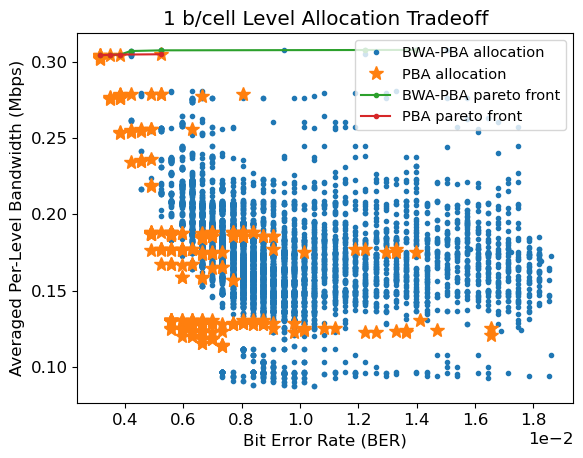

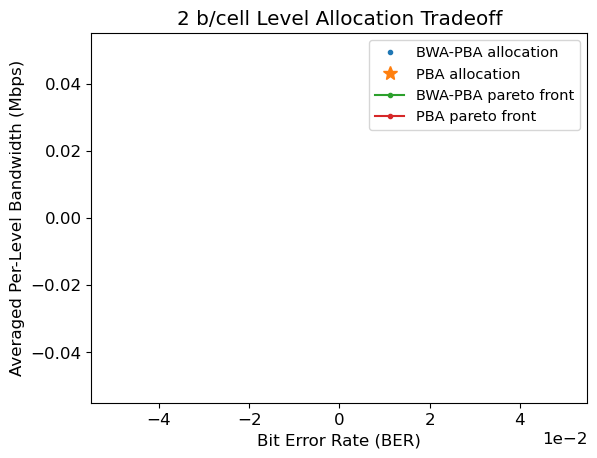

,bpc,allocation,read_bounds,bw,ber,cer,is_pba,bacc
0,1,"((2, 35), (50, 63))","[0, 41, 64]",304121.625611,0.003147,0.003147,True,0.996853
18,1,"((2, 35), (47, 63))","[0, 39, 64]",304401.388975,0.003497,0.003497,True,0.996503
26,1,"((2, 35), (46, 63))","[0, 39, 64]",304545.251358,0.003846,0.003846,True,0.996154
56,1,"((2, 30), (43, 63))","[0, 33, 64]",306882.333669,0.004196,0.004196,False,0.995804
156,1,"((2, 30), (39, 63))","[0, 31, 64]",307336.833470,0.005245,0.005245,False,0.994755
7606,1,"((2, 30), (35, 63))","[0, 29, 64]",307552.999674,0.012238,0.012238,False,0.987762
7966,1,"((2, 30), (34, 63))","[0, 28, 64]",307607.088747,0.013986,0.013986,False,0.986014


In [50]:
# Pareto curve
data["bacc"] = 1 - data["ber"]
best = []
for bpc in range(1, 3):
    data_bpc = data[(data["bpc"] == bpc) & (data["ber"] <= 300e-3)].drop_duplicates(subset=["allocation"])
    data_bpc = data_bpc.drop_duplicates(subset=["ber", "bw"])

    plt.plot(data_bpc["ber"], data_bpc["bw"] / 1e6, ".", label="BWA-PBA allocation")
    plt.plot(data_bpc[data_bpc["is_pba"]]["ber"], data_bpc[data_bpc["is_pba"]]["bw"] / 1e6, "*", markersize=10, label="PBA allocation")

    costs = data_bpc[["bacc", "bw"]].values
    unique_costs = data_bpc[["bacc", "bw"]].drop_duplicates().values #
    is_pareto = np.ones(costs.shape[0], dtype = bool)
    for i, c in enumerate(costs):
        is_pareto[i] = np.all(np.any(np.delete(costs,i,axis=0)<c, axis=1))
    best.append(data_bpc[is_pareto])
    plt.plot(data_bpc[is_pareto]["ber"], data_bpc[is_pareto]["bw"] / 1e6, '.-', label="BWA-PBA pareto front")
    
    pba_data_bpc = data_bpc[data_bpc["is_pba"]]
    pba_costs = pba_data_bpc[["bacc", "bw"]].values
    pba_is_pareto = np.ones(pba_data_bpc.shape[0], dtype = bool)
    for i, c in enumerate(pba_costs):
        pba_is_pareto[i] = np.all(np.any(np.delete(pba_costs,i,axis=0)<c, axis=1))
    best.append(pba_data_bpc[pba_is_pareto & (pba_data_bpc["ber"] == pba_data_bpc["ber"].min())])
    plt.plot(pba_data_bpc[pba_is_pareto]["ber"], pba_data_bpc[pba_is_pareto]["bw"] / 1e6, '.-', label="PBA pareto front")
    
    plt.ticklabel_format(style="sci", axis="x", scilimits=(0,0))
    plt.title(f"{bpc} b/cell Level Allocation Tradeoff")
    plt.xlabel("Bit Error Rate (BER)")
    plt.ylabel("Averaged Per-Level Bandwidth (Mbps)")
    plt.legend(fontsize=10.5)
    plt.show()
best = pd.concat(best).drop_duplicates(subset=["allocation"])
best

bpc                              1
allocation     ((2, 35), (50, 63))
read_bounds            [0, 41, 64]
bw                   304121.625611
ber                       0.003147
cer                       0.003147
is_pba                        True
bacc                      0.996853
Name: 0, dtype: object


/home/ember/anaconda3/lib/python3.9/site-packages/matplotlib/transforms.py:2665: RuntimeWarning: invalid value encountered in double_scalars
  [0.0    , y_scale, (-inb*y_scale)],


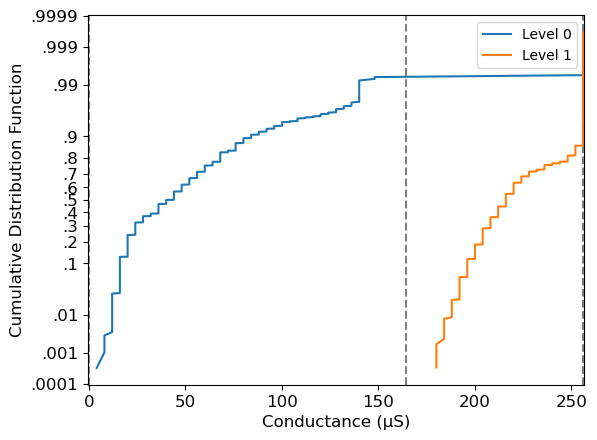

bpc                              1
allocation     ((2, 35), (47, 63))
read_bounds            [0, 39, 64]
bw                   304401.388975
ber                       0.003497
cer                       0.003497
is_pba                        True
bacc                      0.996503
Name: 18, dtype: object


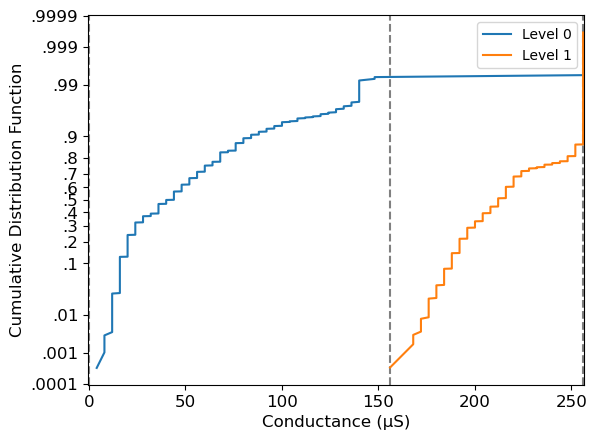

bpc                              1
allocation     ((2, 35), (46, 63))
read_bounds            [0, 39, 64]
bw                   304545.251358
ber                       0.003846
cer                       0.003846
is_pba                        True
bacc                      0.996154
Name: 26, dtype: object


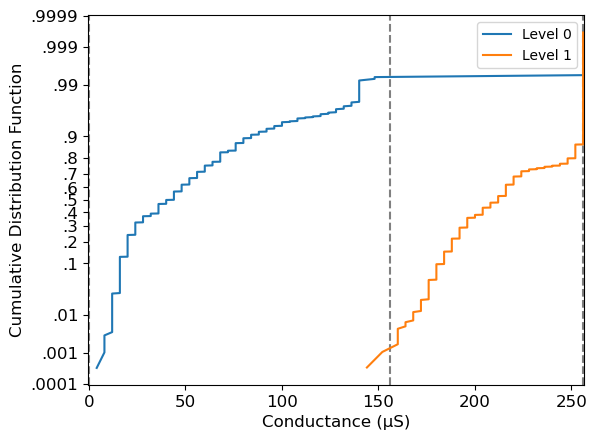

bpc                              1
allocation     ((2, 30), (43, 63))
read_bounds            [0, 33, 64]
bw                   306882.333669
ber                       0.004196
cer                       0.004196
is_pba                       False
bacc                      0.995804
Name: 56, dtype: object


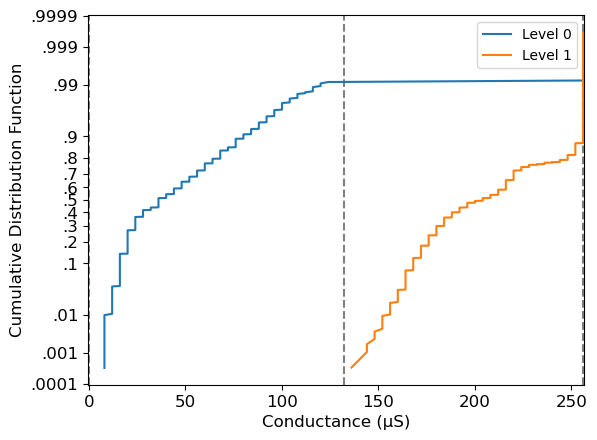

bpc                              1
allocation     ((2, 30), (39, 63))
read_bounds            [0, 31, 64]
bw                    307336.83347
ber                       0.005245
cer                       0.005245
is_pba                       False
bacc                      0.994755
Name: 156, dtype: object


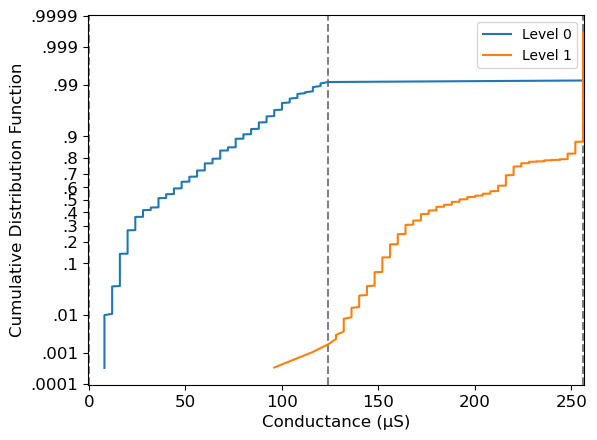

bpc                              1
allocation     ((2, 30), (35, 63))
read_bounds            [0, 29, 64]
bw                   307552.999674
ber                       0.012238
cer                       0.012238
is_pba                       False
bacc                      0.987762
Name: 7606, dtype: object


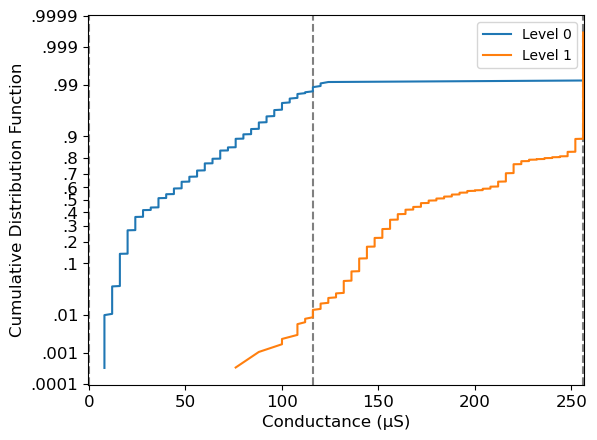

bpc                              1
allocation     ((2, 30), (34, 63))
read_bounds            [0, 28, 64]
bw                   307607.088747
ber                       0.013986
cer                       0.013986
is_pba                       False
bacc                      0.986014
Name: 7966, dtype: object


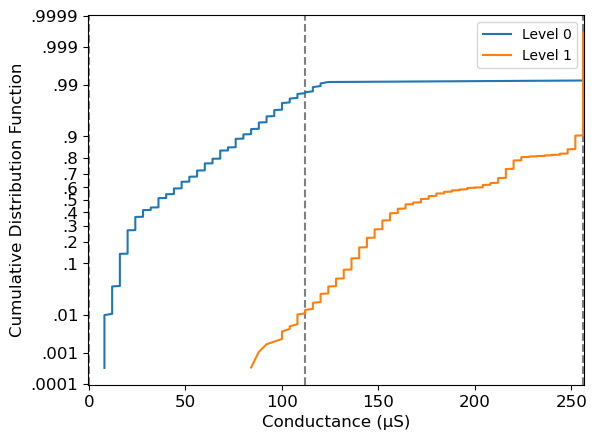

In [51]:
# Visualize allocations
for i, d in best.iterrows():
    plt.xlim(-0.5, 256.5)
    plt.gca().set_yscale("ppf")
    plt.xlabel("Conductance (µS)")
    plt.ylabel("Cumulative Distribution Function")
    print(d)
    for bound in d["read_bounds"]:
        plt.axvline(bound*4, color="gray", linestyle="--")
    for j, lvl in enumerate(d["allocation"]):
        # Get the relevant data
        lvldata = tdata[(tdata["timept"] == timept) & (tdata["lower"] == lvl[0]) & (tdata["upper"] == lvl[1])]

        # Plot distributions
        plt.plot(sorted(lvldata["lvl"].values * 4), np.linspace(0.5/len(lvldata["lvl"].values), 1-0.5/len(lvldata["lvl"].values), len(lvldata["lvl"].values)), label=f"Level {j}")
    plt.legend(fontsize=10)
    plt.show()

In [52]:
# Write out configs
import json
from copy import deepcopy
with open("../settings/config.json") as config_tmpl_file:
    config_tmpl = json.load(config_tmpl_file)

for i, d in best.iterrows():
    with open(f"../settings/opt/{d['bpc']}bpc_wear_{'bwa' if not d['is_pba'] else 'pba'}_{i}.json", "w") as config_outfile:
        config = deepcopy(config_tmpl)
        config["num_levels"] = len(d["allocation"])
        config["level_settings"] = config["level_settings"][:config["num_levels"]]
        config["post_read_setup_cycles"] = 2
        for lvl, ((lower_write, upper_write), read_bound) in enumerate(zip(d["allocation"], d["read_bounds"][1:])):
            config["level_settings"][lvl]["adc_lower_write_ref_lvl"] = lower_write
            config["level_settings"][lvl]["adc_upper_write_ref_lvl"] = upper_write
            config["level_settings"][lvl]["adc_upper_read_ref_lvl"] = min(read_bound, 63)
        json.dump(config, config_outfile, indent=4)